###**Maestría en Inteligencia Artificial Aplicada**
###**Curso: Inteligencia Artificial y Aprendizaje Automático**
####**Tecnológico de Monterrey**
#####**Prof Luis Eduardo Falcón Morales**

###**Nombre del estudiante: Andrés Castillo Nassar**

###**Matrícula: 1168530**

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import FunctionTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PowerTransformer


In [9]:
# Cargamos el archivo que está en la siguiente carpeta de Google-Colab:
DIR = "/content/sample_data/"
os.chdir(DIR)

misdatos = pd.read_csv("california_housing_train.csv", sep=",")
misdatos.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#**Matriz de Correlación de Pearson**

INSTRUCCIONES:

En esta fase, se realiza el análisis de correlación entre las variables del dataframe "misdatos". El objetivo es generar y visualizar una matriz de correlación que muestre los valores numéricos que describen la relación entre cada par de variables. Para una mejor interpretación visual, se utilizará un mapa de calor (heatmap) implementado con la librería Seaborn, empleando la paleta de colores 'BuGn'. Esta representación gráfica facilita la identificación de posibles patrones y relaciones significativas entre las variables del dataset.

documentación:

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

https://seaborn.pydata.org/generated/seaborn.heatmap.html

https://matplotlib.org/stable/tutorials/colors/colormaps.html


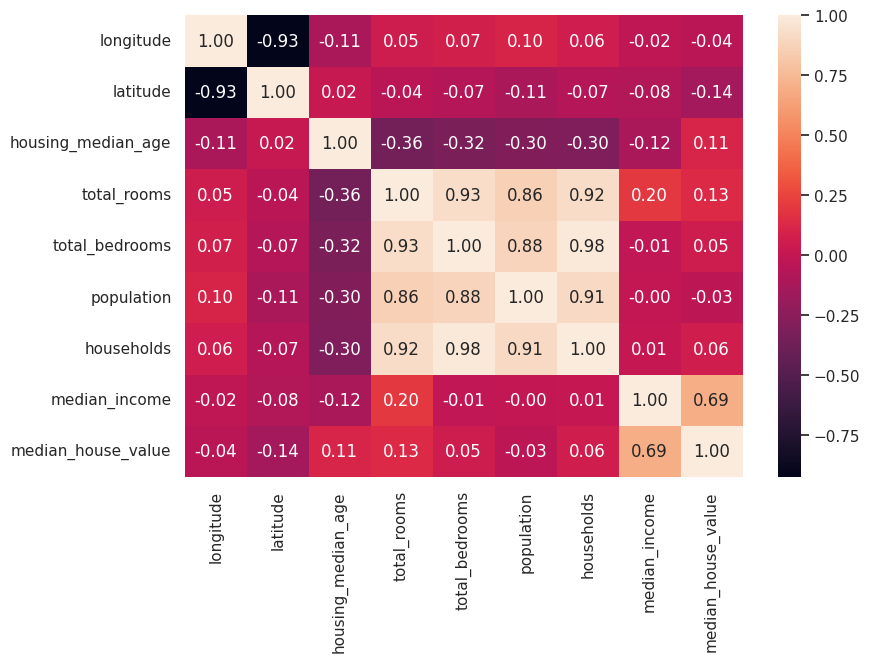

In [10]:
sns.set(rc={'figure.figsize':(9,6)})

correlation_matrix = misdatos.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")

plt.show()

#**Transformaciones e Histogramas de variables**

En esta fase del proyecto, se aplicarán transformaciones matemáticas a las siguientes 7 variables del dataset:

*   housing_median_age
*   total_rooms
*   total_bedrooms
*   population
*   households
*   median_income
*   median_house_value

Las transformaciones incluyen el cálculo de:

*   Raíz cuadrada con Numpy.
*   Logaritmo natural con Numpy.
*   Potencia 2 (i.e., elevar al cuadrado) con Numpy.
*   Box-Cox con scikit-learn.

Tras aplicar cada una de estas transformaciones utilizando Numpy y Scikit-learn, se generarán y visualizarán histogramas con 20 barras (bins) para cada conjunto de datos transformado, permitiendo el análisis de la distribución de las variables modificadas.

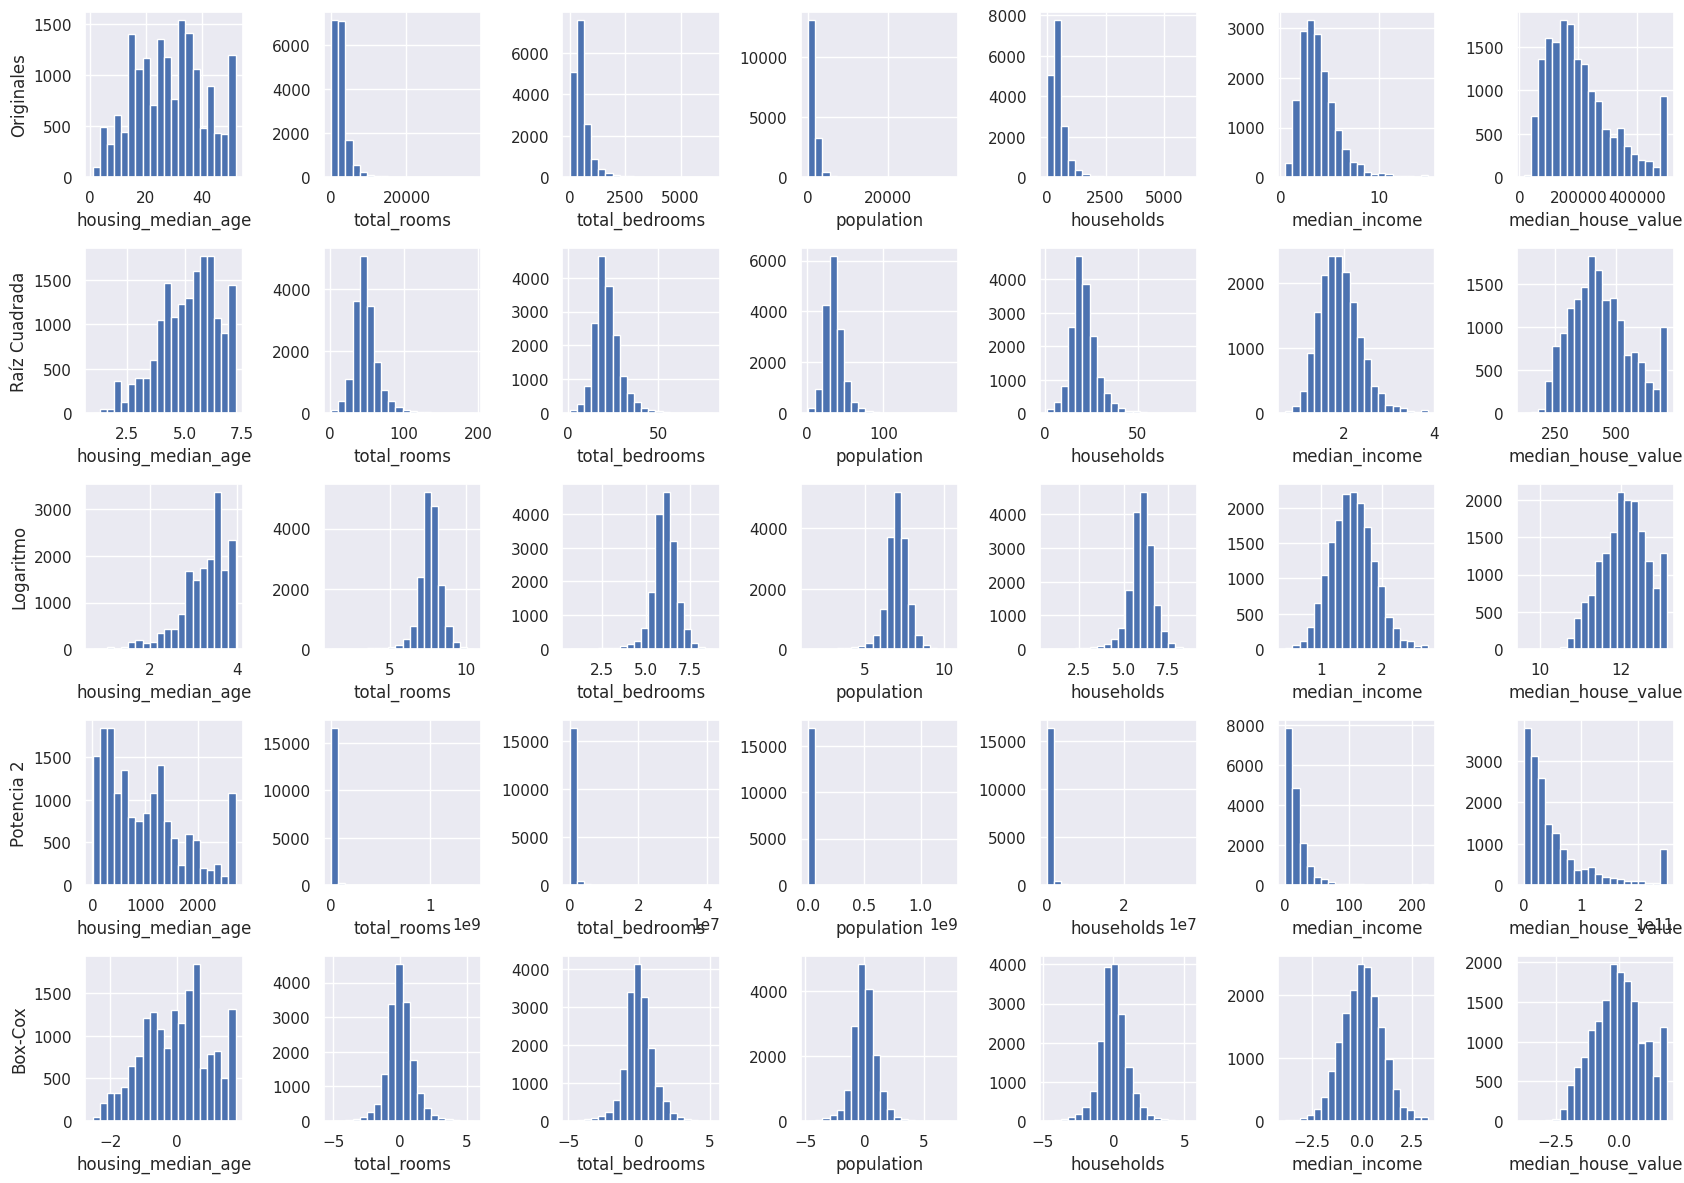

In [11]:
# Lista de los nombres de las 7 variables que trabajaremos en este ejercicio.
variables_a_transformar = ['housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value']

sns.set(rc={'figure.figsize': (17, 12)})
fig, axes = plt.subplots(5, 7)

for k in range(7):

    # Original data
    plt.subplot(5, 7, k + 1)
    Transf0 = misdatos[variables_a_transformar[k]]
    plt.hist(Transf0, bins=20)
    plt.xlabel(variables_a_transformar[k])
    if k == 0:
        plt.ylabel('Originales')

    # Data transformed with square root
    plt.subplot(5, 7, k + 8)
    Transf1 = np.sqrt(misdatos[variables_a_transformar[k]])  # Raíz cuadrada
    plt.hist(Transf1, bins=20)
    plt.xlabel(variables_a_transformar[k])
    if k == 0:
        plt.ylabel('Raíz Cuadrada')

    # Data transformed with natural logarithm
    plt.subplot(5, 7, k + 15)
    Transf2 = np.log(misdatos[variables_a_transformar[k]] + 1)  # Logaritmo natural
    plt.hist(Transf2, bins=20)
    plt.xlabel(variables_a_transformar[k])
    if k == 0:
        plt.ylabel('Logaritmo')

    # Data transformed by squaring
    plt.subplot(5, 7, k + 22)
    Transf3 = np.square(misdatos[variables_a_transformar[k]])  # Elevado al cuadrado
    plt.hist(Transf3, bins=20)
    plt.xlabel(variables_a_transformar[k])
    if k == 0:
        plt.ylabel('Potencia 2')

    # Data transformed with Box-Cox (assuming positive values)
    plt.subplot(5, 7, k + 29)
    positive_data = misdatos[variables_a_transformar[k]][misdatos[variables_a_transformar[k]] > 0]  # Ensure only positive data for Box-Cox
    transformer = PowerTransformer(method='box-cox')
    Transf4 = transformer.fit_transform(positive_data.values.reshape(-1, 1)).flatten()
    plt.hist(Transf4, bins=20)
    plt.xlabel(variables_a_transformar[k])
    if k == 0:
        plt.ylabel('Box-Cox')

plt.tight_layout()
plt.show()


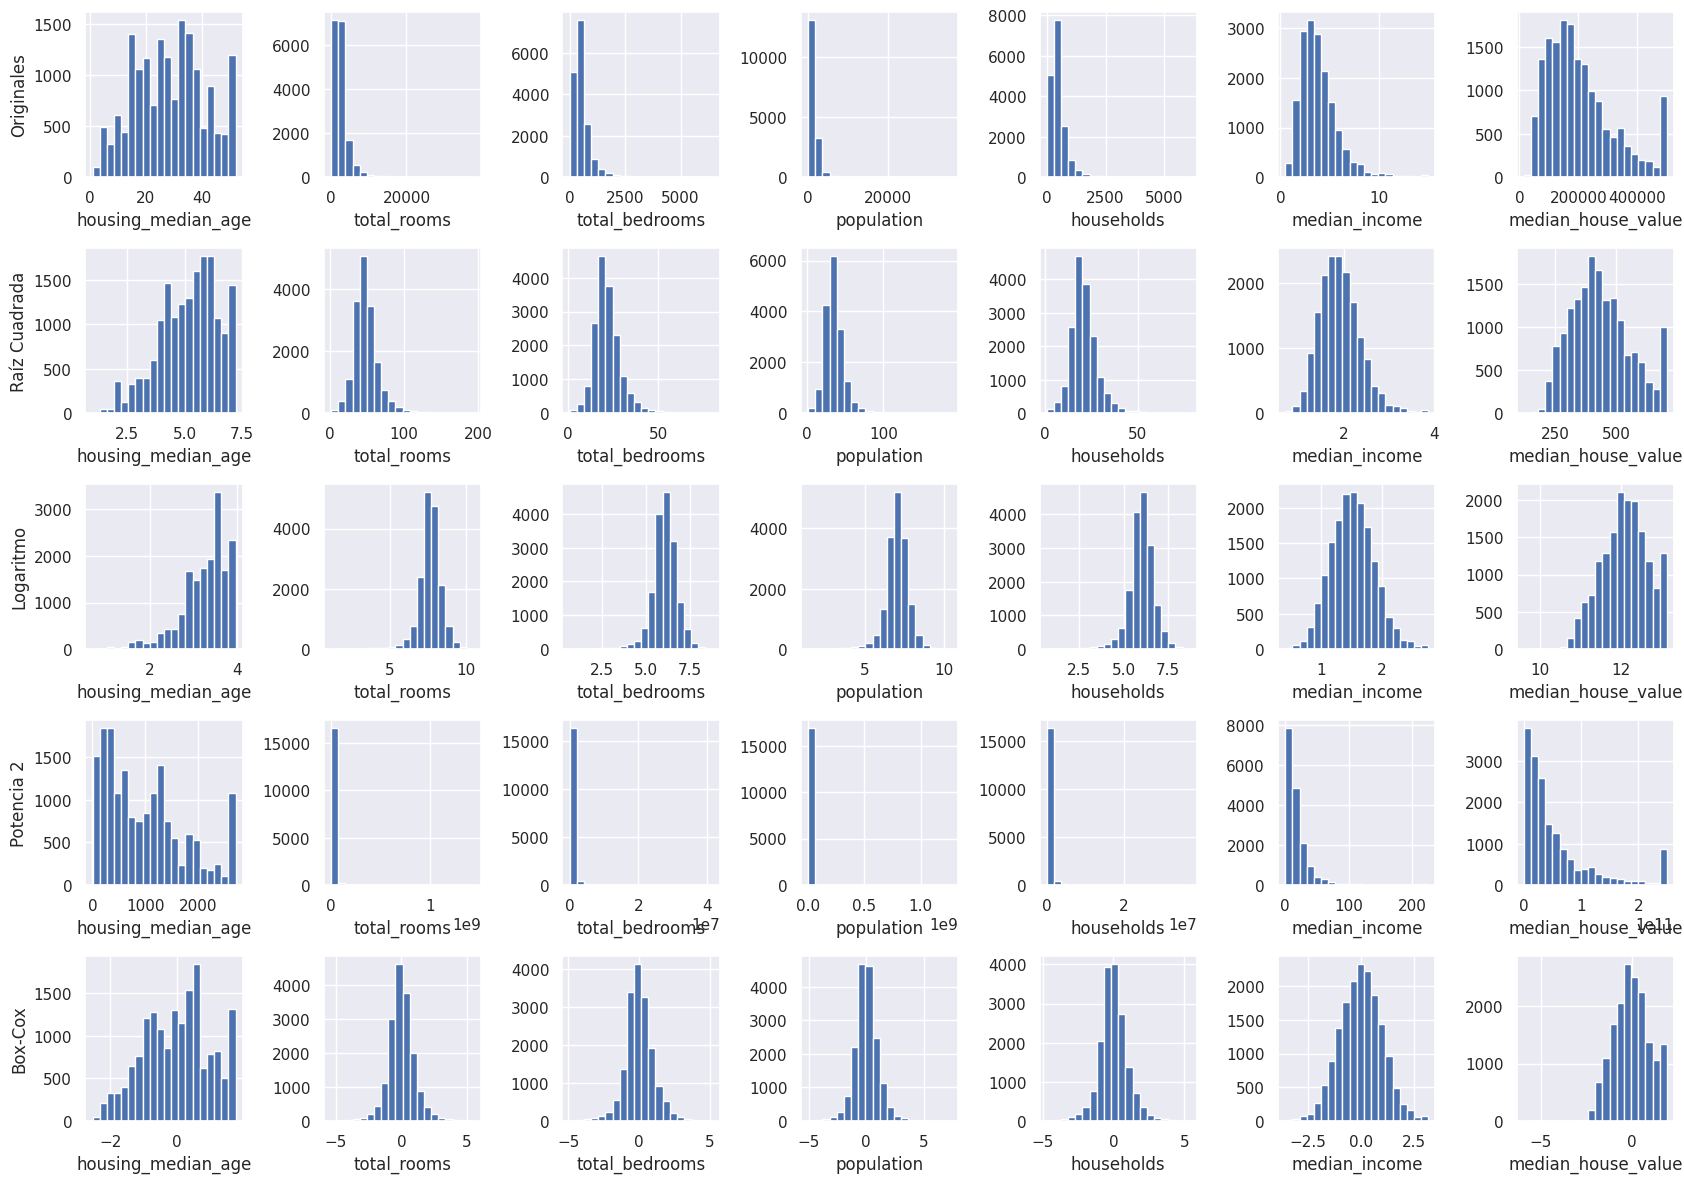

In [12]:
# Lista de los nombres de las 7 variables que trabajaremos en este ejercicio.
variables_a_transformar = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

sns.set(rc={'figure.figsize':(17,12)})
fig, axes = plt.subplots(5, 7)

for k in range(0, 7):

    # Datos originales
    plt.subplot(5, 7, k + 1)
    Transf0 = misdatos[variables_a_transformar[k]]  # Asigna los valores sin transformar
    plt.hist(Transf0, bins=20)                # Histograma de los datos originales
    plt.xlabel(variables_a_transformar[k])
    if k == 0:
        plt.ylabel('Originales')

    # Datos transformados con raíz cuadrada
    plt.subplot(5, 7, k + 8)
    Transf1 = np.sqrt(misdatos[variables_a_transformar[k]])  # Aplica raíz cuadrada
    plt.hist(Transf1, bins=20)                         # Histograma de los datos transformados
    plt.xlabel(variables_a_transformar[k])
    if k == 0:
        plt.ylabel('Raíz Cuadrada')

    # Datos transformados con logaritmo natural
    plt.subplot(5, 7, k + 15)
    Transf2 = np.log(misdatos[variables_a_transformar[k]] + 1)  # Aplica logaritmo natural, evita log(0)
    plt.hist(Transf2, bins=20)                           # Histograma de los datos transformados
    plt.xlabel(variables_a_transformar[k])
    if k == 0:
        plt.ylabel('Logaritmo')

    # Datos transformados con la potencia de 2
    plt.subplot(5, 7, k + 22)
    Transf3 = np.square(misdatos[variables_a_transformar[k]])  # Eleva al cuadrado
    plt.hist(Transf3, bins=20)                           # Histograma de los datos transformados
    plt.xlabel(variables_a_transformar[k])
    if k == 0:
        plt.ylabel('Potencia 2')

    # Datos transformados con Box-Cox
    plt.subplot(5, 7, k + 29)
    # Asegura todos los valores positivos para Box-Cox
    positive_data = misdatos[variables_a_transformar[k]] + (1 - misdatos[variables_a_transformar[k]].min())
    transformer = PowerTransformer(method='box-cox')
    Transf4 = transformer.fit_transform(positive_data.values.reshape(-1, 1)).flatten()
    plt.hist(Transf4, bins=20)                           # Histograma de los datos transformados
    plt.xlabel(variables_a_transformar[k])
    if k == 0:
        plt.ylabel('Box-Cox')

plt.tight_layout()
plt.show()


#**Métricas de desempeño: $RMSE$, $MAE$ y $MAPE$**



INSTRUCCIONES:

En esta fase, se implementarán tres métricas de error para evaluar la precisión de los modelos de predicción: $RMSE$ (Root Mean Squared Error), $MAE$ (Mean Absolute Error), y $MAPE$ (Mean Absolute Percentage Error). Cada métrica se definirá como una función que recibirá dos argumentos: los valores observados reales $\hat{y}$ y los valores de predicción $\hat{y}$. Utilizando solo funciones de NumPy como mean, square y abs, se calculará el error entre los valores observados y los predichos. Las funciones a implementar serán mi_RMSE, mi_MAE, y mi_MAPE, y cada una devolverá un valor numérico que representará la métrica correspondiente según las fórmulas dadas en el archivo de referencia.


In [13]:
# función: mi_RMSE:
def mi_RMSE(y, y_pred):
    return np.sqrt(np.mean(np.square(y - y_pred)))




# función: mi_MAE:
def mi_MAE(y, y_pred):
    return np.mean(np.abs(y - y_pred))




# función: mi_MAPE:
def mi_MAPE(y, y_pred):
    return np.mean(np.abs((y - y_pred) / y)) * 100


In [14]:
Xtrain = misdatos.drop('median_house_value', axis='columns')
ytrain = misdatos['median_house_value']

num_prepro_pipeline = Pipeline(steps = [('imputar', SimpleImputer(strategy='median')),
                                        ('scalar', MinMaxScaler(feature_range=(1, 2))),
                                        ('sqrt', FunctionTransformer(np.sqrt))
                                        ])

numerical_features = ['total_rooms','total_bedrooms','population','households','median_income']

columnasTransformer = ColumnTransformer(transformers = [('numerical', num_prepro_pipeline, numerical_features)],
                                        remainder='passthrough')

modelo_LR = LinearRegression()

scores_RMSEVal = []
scores_MAEVal = []
scores_MAPEVal = []

kf = KFold(n_splits= 10, shuffle=True)

for train_index, val_index in kf.split(Xtrain):

  X_train, X_val = Xtrain.loc[train_index], Xtrain.loc[val_index]
  y_train, y_val = ytrain[train_index], ytrain[val_index]

  XtrainFit = columnasTransformer.fit(X_train)
  XtrainTransf = XtrainFit.transform(X_train)

  modelo_LR = modelo_LR.fit(XtrainTransf, y_train)

  XvalTransf = XtrainFit.transform(X_val)
  yhatVal = modelo_LR.predict(XvalTransf)

  scores_RMSEVal.append(mi_RMSE(y_val, yhatVal))
  scores_MAEVal.append(mi_MAE(y_val, yhatVal))
  scores_MAPEVal.append(mi_MAPE(y_val, yhatVal))


# Desplegar información:
results = [scores_RMSEVal, scores_MAEVal, scores_MAPEVal]
names = ['RMSEval','MAEval','MAPEval']

print("\t  %s\t\t%s   \t\t%s" % (names[0],names[1],names[2]))
for i,z in enumerate(zip(scores_RMSEVal, scores_MAEVal, scores_MAPEVal)):
  print("fold[%d]:  %.1f \t\t%.1f  \t\t%.1f%%" % (i+1,z[0],z[1],z[2]))
print("mean(std) %.1f(%.1f)  \t%.1f(%.1f)   \t%.1f%% (%.1f)" % (np.mean(scores_RMSEVal), np.std(scores_RMSEVal),
                                                                np.mean(scores_MAEVal), np.std(scores_MAEVal),
                                                                np.mean(scores_MAPEVal), np.std(scores_MAPEVal)))

	  RMSEval		MAEval   		MAPEval
fold[1]:  68828.3 		50455.9  		29.1%
fold[2]:  67958.5 		50173.1  		30.6%
fold[3]:  70106.6 		51263.6  		30.6%
fold[4]:  68601.5 		50161.0  		30.0%
fold[5]:  70099.2 		51479.0  		30.5%
fold[6]:  68779.8 		50204.1  		29.3%
fold[7]:  71655.3 		51638.8  		30.8%
fold[8]:  66818.2 		49317.1  		29.9%
fold[9]:  70924.5 		52615.6  		31.2%
fold[10]:  66520.1 		49551.7  		30.0%
mean(std) 69029.2(1594.0)  	50686.0(978.7)   	30.2% (0.6)


Precisión del modelo: Con un RMSE de 69,000 y un MAE de 50,686, se puede concluir que el modelo tiene una desviación significativa en las predicciones de los precios inmobiliarios. Si el rango de los precios es amplio (por ejemplo, precios que varían entre 100,000 y varios millones), estos errores pueden ser aceptables. Sin embargo, si los precios son más bajos, estos errores representarían una alta imprecisión.

Estabilidad del modelo: Las desviaciones estándar de las métricas RMSE, MAE y MAPE son pequeñas, lo que indica que el modelo tiene un rendimiento consistente a través de los diferentes folds de validación cruzada. Esto es una señal positiva de que el modelo generaliza bien y no está sobreajustado a un fold específico.

MAPE (30.2%): Un error porcentual promedio de 30.2% es relativamente alto en muchos contextos, lo que sugiere que el modelo tiene dificultades para predecir con alta precisión. Esto puede deberse a una alta variabilidad en los precios de los inmuebles o a la falta de algunas variables importantes en el modelo.

Aunque el modelo es consistente entre los diferentes folds, el nivel de error es bastante alto, con un 30.2% de error porcentual en promedio. Esto indica que el modelo podría beneficiarse de mejoras adicionales, como la inclusión de más variables predictoras, la ingeniería de características, o el ajuste de hiperparámetros, para reducir los errores en las predicciones y mejorar la precisión general del modelo.